## 다중 선형 회귀 (Multi-variable Linear Regression)

In [16]:
# !pip install matplotlib

**다중 선형 회귀의 개요**
* 앞서 학생들이 공부한 시간에 따른 예측 직선을 그리고자 기울기 a와 y 절편 b를 구함                  
* 이 예측 직선을 이용해도 실제 성적 사이에는 약간의 오차가 있었음
* 4시간 공부한 친구는 88점을 예측했는데 이보다 좋은 93점을 받았고, 6시간 공부한 친구는 93점을 받을 것으로 예측했지만 91점을 받았음
* 이러한 차이가 생기는 이유는 공부한 시간 이외의 다른 요소가 성적에 영향을 끼쳤기 때문임
* 더 정확한 예측을 하려면 추가 정보를 입력해야 하며, 정보를 추가해 새로운 예측 값을 구하려면 변수 개수를 늘려 다중 선형 회귀를 만들어 주어야 함


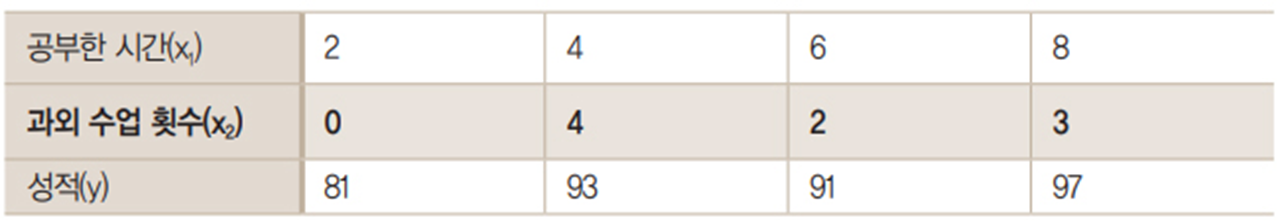

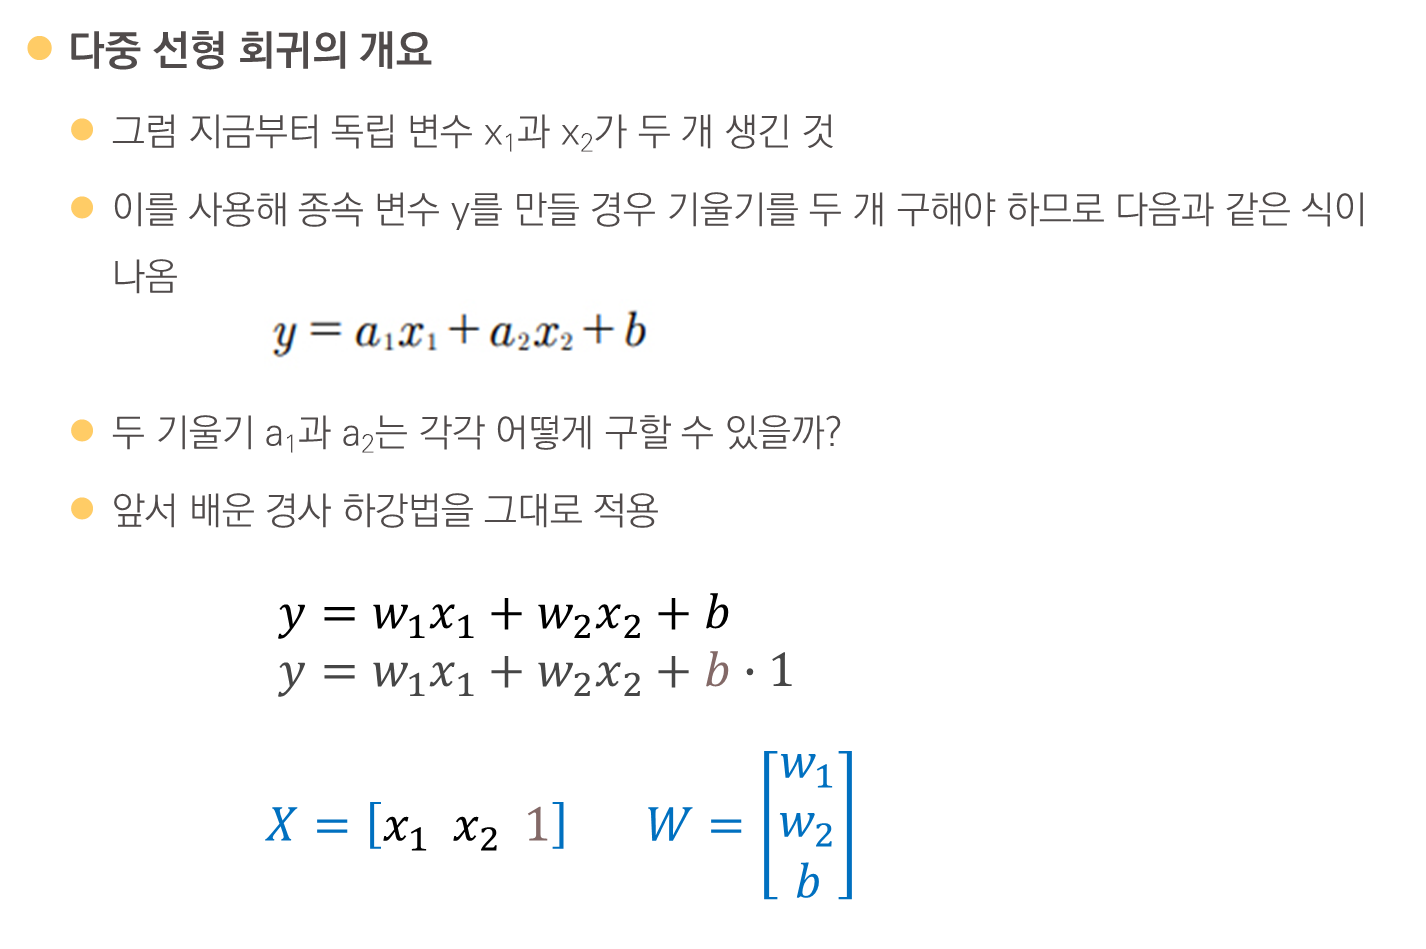

### (1) Numpy로 다중 선형회귀

In [2]:
##########################################################
# 다중 선형 회귀 예제 - 공부시간, 과외수업, 성적
##########################################################
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]])
data, data.shape #(4,3) -> 4개의 데이터, 3개의 특성(공부시간, 과외수업 성적)

(array([[ 2,  0, 81],
        [ 4,  4, 93],
        [ 6,  2, 91],
        [ 8,  3, 97]]),
 (4, 3))

In [3]:
X1 = data[:, 0]  # 공부시간
X2 = data[:, 1]  # 과외수업    
Y = data[:, 2]   # 성적
X1, X2, Y

(array([2, 4, 6, 8]), array([0, 4, 2, 3]), array([81, 93, 91, 97]))

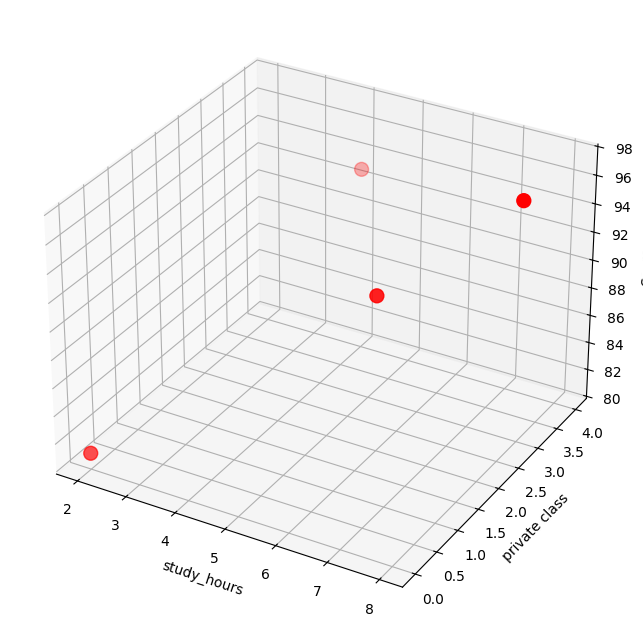

In [ ]:
# 3D 그래프 그려보기
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')  ## 3D 그래프 설정
ax.set_xlabel('study_hours')
ax.set_ylabel('private class')
ax.set_zlabel('Score')

# ax.scatter3D(X1, X2, Y)
ax.scatter(X1, X2, Y, c='r', s=100) 
plt.show()


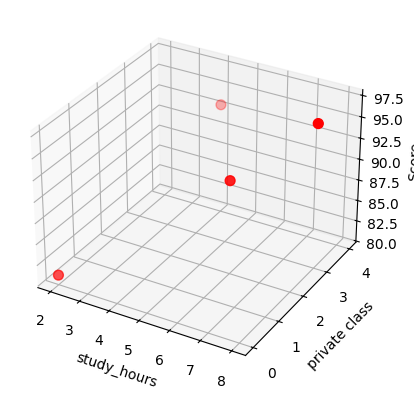

In [5]:
# 그래프 그려보기
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax = fig.subplot(111, projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private class')
ax.set_zlabel('Score')
# ax.scatter3D(X1, X2, Y)
ax.scatter(X1, X2, Y, c='r', s=50) 
plt.show()

In [14]:

# 학습할 변수 : a1, a2, b -> 초기화 (임의의 값)
a1, a2, b = 1, 1, 1

# 하이퍼파라미터 초기값 : 학습률 (learning rate)
lr = 0.01

# 학습 횟수
epochs = 1000

# 학습을 기록할 리스트 준비
MSE_list, a1_list, a2_list, b_list = [], [], [], []

# 학습 #####################
for i in range(epochs + 1): # + 1은 마지막 데이터를 print하기 위함
    
    Y_hat = a1 * X1 + a2 * X2 + b
    MSE = np.mean((Y_hat - Y)**2)
    
    # 미분값(접선의 기울기) 구하기
    dMSE_da1 = 2 * np.mean((Y_hat - Y) * X1)
    dMSE_da2 = 2 * np.mean((Y_hat - Y) * X2)
    dMSE_db = 2 * np.mean(Y_hat - Y)

    # 학습을 하며 a1, a2, b를 수정(업데이트)
    a1 = a1 - lr * dMSE_da1
    a2 = a2 - lr * dMSE_da2
    b = b - lr * dMSE_db
    
    # 그래프를 그리기 위해 누적데이터 만들기
    MSE_list.append(MSE)
    a1_list.append(a1)
    a2_list.append(a2)
    b_list.append(b)
    
    if i % 100 == 0: # 100번마다 print 할 때 사용
        print('epochs=%5d   MSE=%10.4f   a1=%8.4f   a2=%8.4f    b=%8.4f' % (i, MSE, a1, a2, b))

epochs=    0   MSE= 6772.2500   a1=  9.3200   a2=  4.7750    b=  2.6450
epochs=  100   MSE=  483.1273   a1=  9.4154   a2=  5.0262    b= 23.4898
epochs=  200   MSE=  255.9292   a1=  7.2626   a2=  4.2759    b= 38.2897
epochs=  300   MSE=  135.5903   a1=  5.6940   a2=  3.7339    b= 49.0607
epochs=  400   MSE=   71.8510   a1=  4.5524   a2=  3.3396    b= 56.8997
epochs=  500   MSE=   38.0906   a1=  3.7214   a2=  3.0527    b= 62.6047
epochs=  600   MSE=   20.2088   a1=  3.1167   a2=  2.8439    b= 66.7567
epochs=  700   MSE=   10.7375   a1=  2.6766   a2=  2.6920    b= 69.7785
epochs=  800   MSE=    5.7209   a1=  2.3563   a2=  2.5814    b= 71.9776
epochs=  900   MSE=    3.0637   a1=  2.1232   a2=  2.5009    b= 73.5781
epochs= 1000   MSE=    1.6564   a1=  1.9536   a2=  2.4423    b= 74.7430


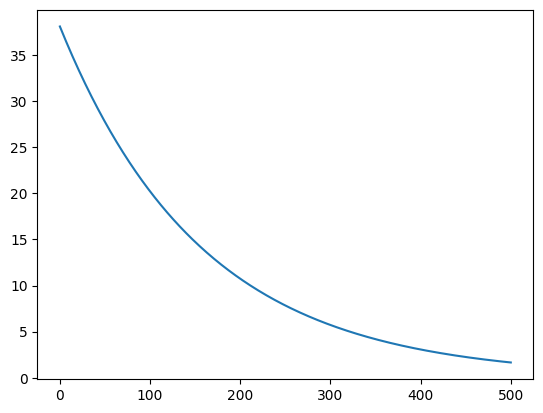

In [7]:
plt.plot(MSE_list[500:])

In [8]:
a1, a2, b

(np.float64(1.9535646476132416),
 np.float64(2.442319895694081),
 np.float64(74.74296976829895))

In [9]:
x1 = np.array([1, 2, 3])
x2 = np.array([10, 20, 30])
xx1, xx2 = np.meshgrid(x1, x2)
xx1

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [10]:
xx2

array([[10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [11]:
a1 * xx1 + a2 * xx2 + b

array([[101.11973337, 103.07329802, 105.02686267],
       [125.54293233, 127.49649698, 129.45006163],
       [149.96613129, 151.91969593, 153.87326058]])

In [12]:
## 학습을 통해 구한 a1, a2, b
a1, a2, b = 1.9535646476132416, 2.442319895694081, 74.74296976829895

In [15]:
### 3차원 공간 하이퍼 평면 그리기 ####
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d  # 3D 그래프 그리는 라이브러리
import numpy as np

XX1, XX2 = np.meshgrid(X1, X2)
YY = a1 * XX1 + a2 * XX2  + b
Y_hat = a1 * X1 + a2 * X2 + b
YY, Y_hat

(array([[ 78.65009906,  82.55722836,  86.46435765,  90.37148695],
        [ 88.41937865,  92.32650794,  96.23363724, 100.14076653],
        [ 83.53473885,  87.44186815,  91.34899745,  95.25612674],
        [ 85.97705875,  89.88418805,  93.79131734,  97.69844664]]),
 array([78.65009906, 92.32650794, 91.34899745, 97.69844664]))

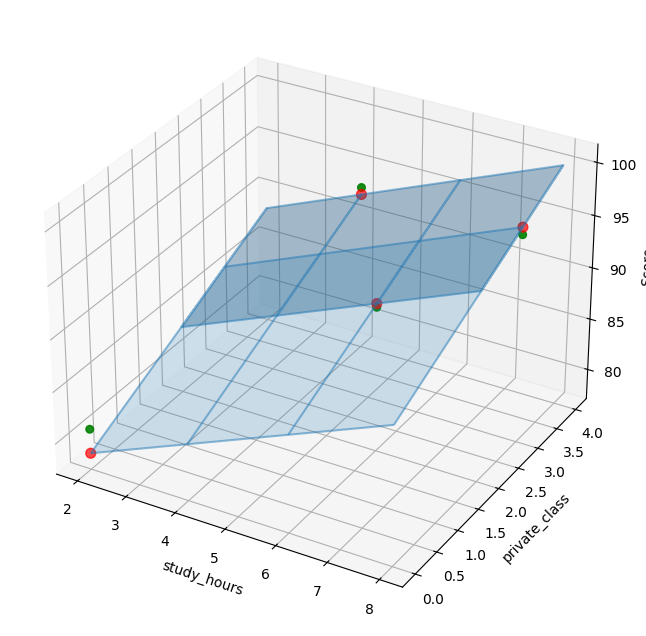

In [16]:
### 3차원 공간 하이퍼 평면 그리기 ####
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d  # 3D 그래프 그리는 라이브러리
import numpy as np

XX1, XX2 = np.meshgrid(X1, X2)
YY = a1 * XX1 + a2 * XX2  + b  # mesh grid위의 좌표 계산 
Y_hat = a1 * X1 + a2 * X2 + b  # 예측한 점수

#그래프로 확인해 봅니다.
fig = plt.figure(figsize = (8, 8))

# ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.scatter3D(X1, X2, Y, c='g', s=30, alpha=0.9)
ax.scatter3D(X1, X2, Y_hat, c='r', s=50, alpha=0.7)
# ax.scatter(x1, x2, y, c='r', s=100)
ax.plot_surface(XX1, XX2, YY, alpha=0.2)
ax.plot_wireframe(XX1, XX2, YY, alpha=0.5)
plt.show()

In [13]:
a1, a2, b

(1.9535646476132416, 2.442319895694081, 74.74296976829895)

In [14]:
# 합습할 변수 : a1, a2, b -> 초기화 (임의의 값)
a1, a2, b = 1, 1, 1

# 하이퍼파라미터 초기값 : 학습률 (learning rate)
lr = 0.01

# 학습 횟수
epochs = 1000

# 학습을 기록할 리스트 준비
MSE_list, a1_list, a2_list, b_list = [], [], [], []

# 학습 #####################
for i in range(epochs + 1): # + 1은 마지막 데이터를 print하기 위함
    Y_hat = a1 * X1 + a2 * X2 + b
    MSE = np.mean((Y_hat - Y)**2)
    dMSE_da1 = 2 * np.mean((Y_hat - Y) * X1)
    dMSE_da2 = 2 * np.mean((Y_hat - Y) * X2)
    dMSE_db = 2 * np.mean(Y_hat - Y)

    a1 = a1 - lr * dMSE_da1
    a2 = a2 - lr * dMSE_da2
    b = b - lr * dMSE_db
    
    MSE_list.append(MSE)
    a1_list.append(a1)
    a2_list.append(a2)
    b_list.append(b)
    
    if i % 100 == 0: # 100번마다 print 할 때 사용
        print("epoch=%d a1=%.2f  a2=%.2f b=%.2f MSE=%.2f" %
             (i, a1, a2, b, MSE))

epoch=0 a1=9.32  a2=4.78 b=2.65 MSE=6772.25
epoch=100 a1=9.42  a2=5.03 b=23.49 MSE=483.13
epoch=200 a1=7.26  a2=4.28 b=38.29 MSE=255.93
epoch=300 a1=5.69  a2=3.73 b=49.06 MSE=135.59
epoch=400 a1=4.55  a2=3.34 b=56.90 MSE=71.85
epoch=500 a1=3.72  a2=3.05 b=62.60 MSE=38.09
epoch=600 a1=3.12  a2=2.84 b=66.76 MSE=20.21
epoch=700 a1=2.68  a2=2.69 b=69.78 MSE=10.74
epoch=800 a1=2.36  a2=2.58 b=71.98 MSE=5.72
epoch=900 a1=2.12  a2=2.50 b=73.58 MSE=3.06
epoch=1000 a1=1.95  a2=2.44 b=74.74 MSE=1.66


In [17]:
###########################################################
# 다중 선형 회귀 예제 - 공부시간, 과외, 성적
###########################################################
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[2, 0, 81], 
                 [4, 4, 93], 
                 [6, 2, 91], 
                 [8, 3, 97]])

X = data[:, :-1]
Y = data[:, [-1]]
X, Y

(array([[2, 0],
        [4, 4],
        [6, 2],
        [8, 3]]),
 array([[81],
        [93],
        [91],
        [97]]))

In [18]:

# 학습할 변수 : a1, a2, b -> 초기화 (임의의 값)
W = np.array([[1], [1]])
b = 1

# 하이퍼파라미터 초기값 : 학습률 (learning rate)
lr = 0.01

# 학습 횟수
epochs = 2000

# 학습을 기록할 리스트 준비
MSE_list, W_list, b_list = [], [], []

# 학습 #####################
for i in range(epochs + 1): # + 1은 마지막 데이터를 print하기 위함
    
    Y_hat = np.matmul(X, W) + b
    MSE = np.mean((Y_hat - Y)**2)
    
    # 미분값(접선의 기울기) 구하기
    dMSE_dW = 2 * np.mean((Y_hat - Y) * X, axis=0).reshape(-1, 1)
    dMSE_db = 2 * np.mean(Y_hat - Y)

    # 학습을 하며 a1, a2, b를 수정(업데이트)
    W = W - lr * dMSE_dW
    b = b - lr * dMSE_db
    
    # 그래프를 그리기 위해 누적데이터 만들기
    MSE_list.append(MSE)
    W_list.append(W)
    b_list.append(b)
    
    
    if i % 100 == 0: # 100번마다 print 할 때 사용
        print(f"{i}\t MSE={MSE:.3f}\t W={W.flatten().round(4)}\t b={b:.3f}")
              


0	 MSE=6772.250	 W=[9.32  4.775]	 b=2.645
100	 MSE=483.127	 W=[9.4154 5.0262]	 b=23.490
200	 MSE=255.929	 W=[7.2626 4.2759]	 b=38.290
300	 MSE=135.590	 W=[5.694  3.7339]	 b=49.061
400	 MSE=71.851	 W=[4.5524 3.3396]	 b=56.900
500	 MSE=38.091	 W=[3.7214 3.0527]	 b=62.605
600	 MSE=20.209	 W=[3.1167 2.8439]	 b=66.757
700	 MSE=10.738	 W=[2.6766 2.692 ]	 b=69.778
800	 MSE=5.721	 W=[2.3563 2.5814]	 b=71.978
900	 MSE=3.064	 W=[2.1232 2.5009]	 b=73.578
1000	 MSE=1.656	 W=[1.9536 2.4423]	 b=74.743
1100	 MSE=0.911	 W=[1.8301 2.3997]	 b=75.591
1200	 MSE=0.516	 W=[1.7402 2.3687]	 b=76.208
1300	 MSE=0.307	 W=[1.6748 2.3461]	 b=76.657
1400	 MSE=0.196	 W=[1.6272 2.3296]	 b=76.983
1500	 MSE=0.138	 W=[1.5926 2.3177]	 b=77.221
1600	 MSE=0.106	 W=[1.5674 2.309 ]	 b=77.394
1700	 MSE=0.090	 W=[1.5491 2.3027]	 b=77.520
1800	 MSE=0.081	 W=[1.5357 2.298 ]	 b=77.612
1900	 MSE=0.077	 W=[1.526  2.2947]	 b=77.679
2000	 MSE=0.074	 W=[1.5189 2.2922]	 b=77.727


In [19]:
Y_hat = np.matmul(X, W) + b
Y_hat

array([[80.76513662],
       [92.97192377],
       [91.42525418],
       [96.75531297]])

In [20]:
MSE = np.mean((Y_hat - Y)**2)
MSE

0.07416548705737444

In [21]:
Y_hat - Y, X

(array([[-0.23486338],
        [-0.02807623],
        [ 0.42525418],
        [-0.24468703]]),
 array([[2, 0],
        [4, 4],
        [6, 2],
        [8, 3]]))

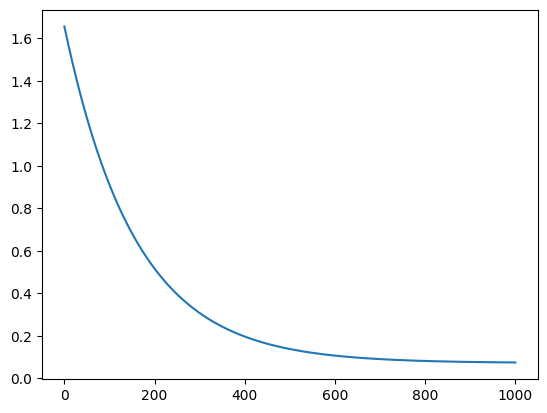

In [22]:
## 학습 history 시각화
import matplotlib.pyplot  as plt
plt.plot(MSE_list[1000:])

In [23]:
W_np = np.array(W_list)
W_np

array([[[ 9.32      ],
        [ 4.775     ]],

       [[11.502     ],
        [ 5.7654    ]],

       [[12.0562735 ],
        [ 6.01741188]],

       ...,

       [[ 1.51902854],
        [ 2.29228441]],

       [[ 1.51896817],
        [ 2.29226357]],

       [[ 1.518908  ],
        [ 2.29224279]]])

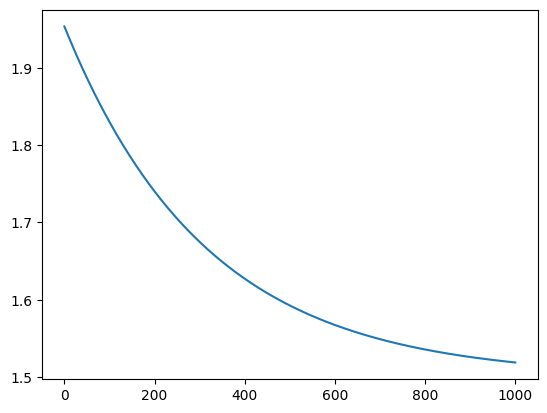

In [24]:

plt.plot(W_np[1000:,0])

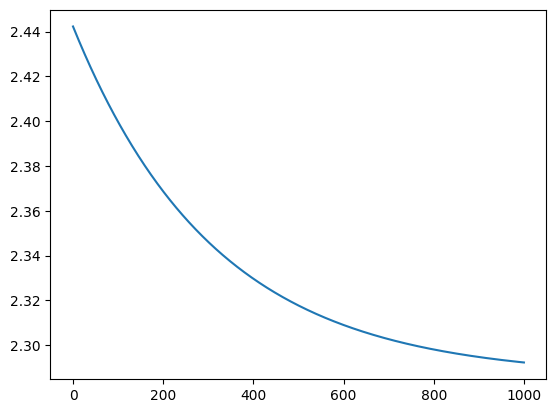

In [25]:

plt.plot(W_np[1000:,1])

In [26]:
Y_hat, Y, X, Y_hat - Y

(array([[80.76513662],
        [92.97192377],
        [91.42525418],
        [96.75531297]]),
 array([[81],
        [93],
        [91],
        [97]]),
 array([[2, 0],
        [4, 4],
        [6, 2],
        [8, 3]]),
 array([[-0.23486338],
        [-0.02807623],
        [ 0.42525418],
        [-0.24468703]]))

In [27]:
(Y_hat - Y).shape, X.shape

((4, 1), (4, 2))

In [28]:
W

array([[1.518908  ],
       [2.29224279]])

In [29]:
### 검증 (5시간 공부, 3번 과외한 경우 예상 점수) ###
X_test = np.array([[5, 3]])
Y_hat = np.matmul(X_test, W) + b
Y_hat

array([[92.19858898]])

### (2) Scikit Learn으로 다중 선형회귀

In [40]:
####################################################################
# Scikit Learn으로 다중선형회귀 
####################################################################
from sklearn.linear_model import LinearRegression

data = np.array([[2, 0, 81], 
                 [4, 4, 93], 
                 [6, 2, 91], 
                 [8, 3, 97]])
X = data[:, :-1]
Y = data[:, -1]

## 선형회귀 클래스로 학습
lr = LinearRegression()
lr.fit(X, Y)
lr.predict(X)

array([80.85714286, 93.        , 91.42857143, 96.71428571])

In [41]:
lr.coef_, lr.intercept_   # W, b

(array([1.5       , 2.28571429]), 77.85714285714286)

In [42]:
lr.score(X, Y)  # R Square (결정계수)

0.9979445015416238

In [43]:
W, b

(array([[1.518908  ],
        [2.29224279]]),
 77.72732062345591)

In [44]:
### 검증 (5시간 공부, 3번 과외한 경우 예상 점수) ###
X_test = np.array([[5, 3]])
lr.predict(X_test)

array([92.21428571])

In [45]:
### 검증 (5시간 공부, 3번 과외한 경우 예상 점수) ###
X_test = np.array([[5, 3]])
Y_hat = np.matmul(X_test, W) + b
Y_hat

array([[92.19858898]])

### (3) Keras로 다중 선형회귀 

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

data = np.array([[2, 0, 81], 
                 [4, 4, 93], 
                 [6, 2, 91], 
                 [8, 3, 97]])
X = data[:, :-1]
Y = data[:, -1]

model = Sequential()
model.add(Dense(1, input_shape=(2,)))
model.compile(loss='mse', optimizer=Adam(learning_rate=0.1))   
# model.compile(loss='mse', optimizer='adam', metrics=['mse'])   
history = model.fit(X, Y, epochs=2000) # , verbose=0)


Epoch 1/2000


c:\Users\dlwlg\anaconda3\envs\py310_yolo\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - loss: 7596.0254
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 7450.2324
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 7306.0591
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7163.5288
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 7022.6699
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 6883.5073
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 6746.0635
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 6610.3628
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 6476.4268
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 6344.2754
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 6213.9268
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 6085.3994
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 5958.7095
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 5833.8706
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [37]:
print(X, Y)
model.predict(X)

[[2 0]
 [4 4]
 [6 2]
 [8 3]] [81 93 91 97]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[ 73.85007],
       [ 90.48942],
       [ 91.41   ],
       [100.18997]], dtype=float32)

<Axes: >

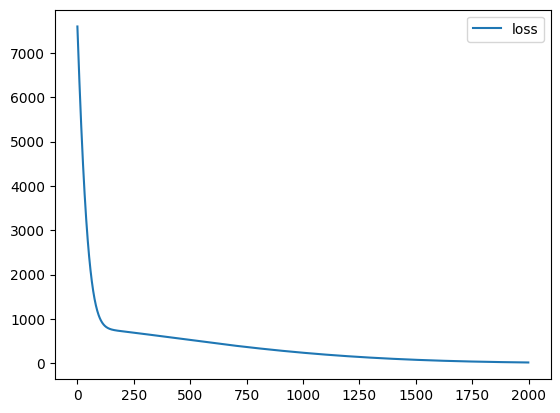

In [38]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [39]:
model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[90.94971]], dtype=float32)